In [1]:
import os
import sys

import pandas as pd
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
from importlib import reload

sys.path.append('/home/feldheimlab/population-encoding-main')

from Experiment import *
savedir = '/media/feldheimlab/IMAGING/Brian/auditory'

In [2]:
wd = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary = scipy.io.loadmat(wd + 'eisummary.mat')
xy = scipy.io.loadmat(wd + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

In [3]:
wd2 = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-01-30-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf2 = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs2 = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location2 = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo2  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary2 = scipy.io.loadmat(wd + 'eisummary.mat')
xy2 = scipy.io.loadmat(wd + 'xy.mat')
datasets2 = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise2 = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
197/197 neurons are in the SC
	Loading AuditorySpotSummary_4.mat with SciPy
	Loading AuditorySpotSummary_4.mat with SciPy
	Loading AuditorySpotSummary_9.mat with SciPy
	Loading AuditorySpotSummary_9.mat with SciPy
53/197 auditory neurons are in the SC
54/197 auditory neurons are in the SC
45/130 auditory neurons are in the SC
79/130 auditory neurons are in the SC


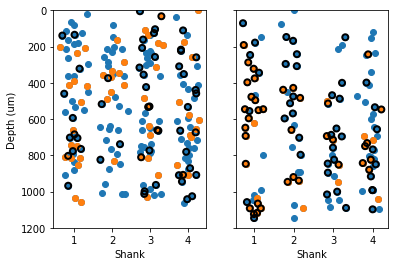

In [7]:

#load the data for each of the datsets
print(wd)
e = Experiment(wd) # load the experimental data
# e.resetUseIDs()
e2 = Experiment(wd2) # load the experimental data

fig, axs = plt.subplots(1,2)


print('{0}/{1} neurons are in the SC'.format(e.nNeu, e.nNeuTotal))
axs[0].scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='neurons')
axs[1].scatter(e2.y[e2.useIDs], e2.neurons['depth'][e2.useIDs], label='neurons')

posneu1 = np.where(e2.loadData('AuditorySpotSummary_4.mat')['posneu'])[0]
posneu2 = np.where(e.loadData('AuditorySpotSummary_4.mat')['posneu'])[0]
posneu3 = np.where(e2.loadData('AuditorySpotSummary_9.mat')['posneu'])[0]
posneu4 = np.where(e.loadData('AuditorySpotSummary_9.mat')['posneu'])[0]

axs[0].scatter(e.y[posneu2], e.neurons['depth'][posneu2], label='posneu pre')
axs[0].scatter(e.y[posneu4], e.neurons['depth'][posneu4], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')

axs[1].scatter(e2.y[posneu1], e2.neurons['depth'][posneu1], label='posneu pre')
axs[1].scatter(e2.y[posneu3], e2.neurons['depth'][posneu3], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')

print('{0}/{1} auditory neurons are in the SC'.format(len(posneu2), e.nNeuTotal))
print('{0}/{1} auditory neurons are in the SC'.format(len(posneu4), e.nNeuTotal))

print('{0}/{1} auditory neurons are in the SC'.format(len(posneu1), e2.nNeuTotal))
print('{0}/{1} auditory neurons are in the SC'.format(len(posneu3), e2.nNeuTotal))

# e.removeWaveforms(5) #remove axon-like waveforms; class 5 waveforms
# print('{0}/{1} neurons are in the SC and have proper waveforms'.format(e.nNeu, e.nNeuTotal))
# plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='Non-axonal')

# compare useIDs and those that area visual responive
# e.getVisNeurons()
# vis_ids = keepsimlist(e.useIDs, e.sig_vis)
# print('{0}/{1} neurons are in the SC, have proper waveforms, and visually responsive'.format(len(vis_ids), e.nNeuTotal))
# plt.scatter(e.y[vis_ids], e.neurons['depth'][vis_ids], label='visual')

axs[0].set_ylim([1200,0])
axs[0].set_ylabel('Depth (um)')
axs[0].set_xlabel('Shank')
axs[0].set_xticks([0,200,400,600],[1,2,3,4])

axs[1].set_ylim([1200,0])
# axs[1].set_ylabel('Depth (um)')
axs[1].set_yticklabels([])
axs[1].set_xlabel('Shank')
axs[1].set_xticks([0,200,400,600],[1,2,3,4])
plt.savefig(savedir + '/puretones_locations.png', dpi=300)

plt.show()

In [8]:
timerange = 1000
timeBinSz = 20

pat5 = e.loadData('AuditorySpotSummary_4.mat')['patterns_all']['fullpat'][0][0][0]
data_mat5 = patternToMatrix(pat5, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat10 = e.loadData('AuditorySpotSummary_9.mat')['patterns_all']['fullpat'][0][0][0]
data_mat10 = patternToMatrix(pat10, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat52 = e2.loadData('AuditorySpotSummary_4.mat')['patterns_all']['fullpat'][0][0][0]
data_mat52 = patternToMatrix(pat52, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat102 = e2.loadData('AuditorySpotSummary_9.mat')['patterns_all']['fullpat'][0][0][0]
data_mat102 = patternToMatrix(pat102, timerange, timeBinSz, neuron_list=None, norm=False, count=True) 

	Loading AuditorySpotSummary_4.mat with SciPy
	Loading AuditorySpotSummary_9.mat with SciPy
	Loading AuditorySpotSummary_4.mat with SciPy
	Loading AuditorySpotSummary_9.mat with SciPy


(197, 1, 29, 30, 50)


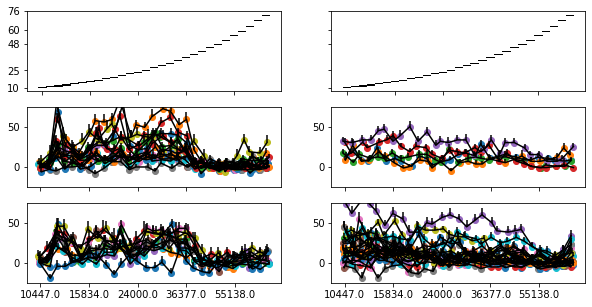

5 22
14 11
[11, 47]
[]


In [9]:
similar = np.arange(pat10.shape[-1])
print(data_mat5.shape)


puretones = [10446.60675955349,11196.39589844169,12000.0,12861.281550435517,13784.380259964422,
        14773.732960138994,15834.09492927473,16970.562748477143,18188.598798124778,19494.05751254965,
        20893.213519106976,22392.79179688338,24000.0,25722.563100871033,27568.760519928845,29547.465920277988,
        31668.18985854946,33941.125496954286,36377.197596249556,38988.1150250993,41786.42703821395,
        44785.58359376676,48000.0,51445.12620174206,55137.52103985769,59094.931840555975,
        63336.37971709894,67882.25099390857,72754.39519249908]

thresh = 15
BLNcolors= ['r','b']

r_transp = [0.5,  0,0.5,  0,0.5,1.0,0.5,0.5,  0,0.5,0.66,0.34,0.66,0.34,0.5]
b_transp = [  0,0.5,  0,0.5,0.5,  0,0.5,0.5,1.0,0.5,0.34,0.66,0.34,0.66,0.5]


fig, axs = plt.subplots(3,2, figsize=(10,5))

for b, puretone in enumerate(puretones):
    axs[0][0].fill_between(np.arange(0,1,0.1)+b-0.5, puretone , puretone+10, color = 'k')
    axs[0][1].fill_between(np.arange(0,1,0.1)+b-0.5, puretone , puretone+10, color = 'k')
axs[0][0].set_yticks([10000,25000, 48000, 60000, 76000])            
axs[0][1].set_yticks([10000,25000, 48000, 60000, 76000])            
axs[0][0].set_yticklabels([10,25,48,60,76])   
axs[0][1].set_yticklabels([])        
axs[0][0].set_xticks(np.arange(29)[::6])   
axs[0][1].set_xticks(np.arange(29)[::6])
axs[0][0].set_xticklabels([])   
axs[0][1].set_xticklabels([])
PURneuron2 = []
for sim in posneu2:
    base = np.mean(data_mat5[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat5[sim,0,:,:,:1]/0.02, axis=(1,2))-base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat5[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PURneuron2.append(sim)
        xs = np.arange(29)+np.random.random(29)*0.5 - 0.25
        axs[1][0].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[1][0].scatter(xs, image)

PURneuron1 = []
for sim in posneu1:
    base = np.mean(data_mat52[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat52[sim,0,:,:,:1]/0.02, axis=(1,2)) - base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat52[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PURneuron1.append(sim)
        xs = np.arange(29)+np.random.random(29)*0.5 - 0.25
        axs[1][1].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[1][1].scatter(xs, image)
axs[1][0].set_ylim([-25,75])   
axs[1][1].set_ylim([-25,75])                    
axs[1][0].set_xticks(np.arange(29)[::6])   
axs[1][1].set_xticks(np.arange(29)[::6])
axs[1][0].set_xticklabels([])   
axs[1][1].set_xticklabels([])
PURneuron4 = []
for sim in posneu4:
    base = np.mean(data_mat10[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat10[sim,0,:,:,:1]/0.02, axis=(1,2)) - base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat10[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PURneuron4.append(sim)
        xs = np.arange(29)+np.random.random(29)*0.5 - 0.25
        axs[2][0].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[2][0].scatter(xs, image)

PURneuron3 = []        
for sim in posneu3:
    base = np.mean(data_mat102[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat102[sim,0,:,:,:1]/0.02, axis=(1,2))-base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat102[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PURneuron3.append(sim)
        xs = np.arange(29)+np.random.random(29)*0.5 - 0.25
        axs[2][1].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[2][1].scatter(xs, image)
        
axs[2][0].set_ylim([-25,75])   
axs[2][1].set_ylim([-25,75])
axs[2][0].set_xticks(np.arange(29)[::6])   
axs[2][1].set_xticks(np.arange(29)[::6])
axs[2][0].set_xticklabels(np.round(puretones,0)[::6])   
axs[2][1].set_xticklabels(np.round(puretones,0)[::6])
plt.savefig(savedir + '/puretone_tone locations.png', dpi=300)

plt.show()

print(len(PURneuron1), len(PURneuron3))
print(len(PURneuron2), len(PURneuron4))

print(keepsimlist(PURneuron1, PURneuron3))
print(keepsimlist(PURneuron2, PURneuron4))

right-top, BLN positive:  7


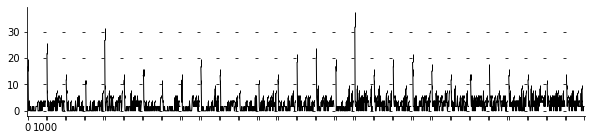

right-top, BLN positive:  11


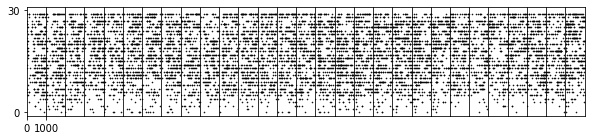

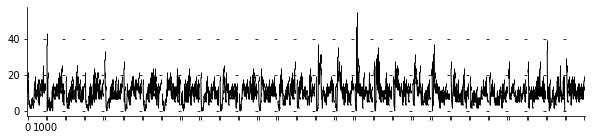

right-top, BLN positive:  31


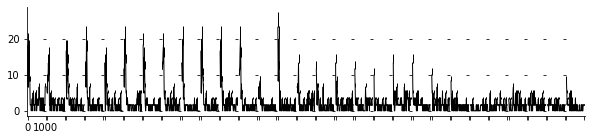

right-top, BLN positive:  47


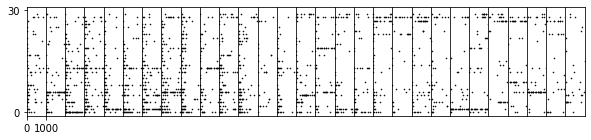

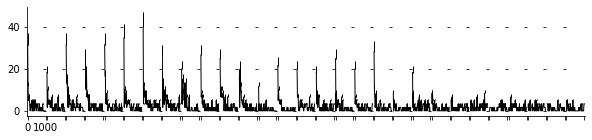

right-top, BLN positive:  125


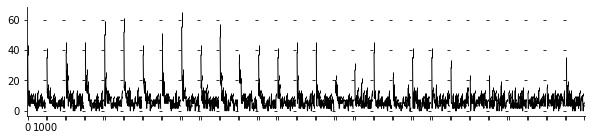

right-bottom, BLN positive:  11


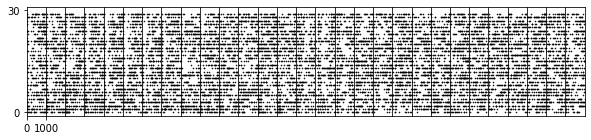

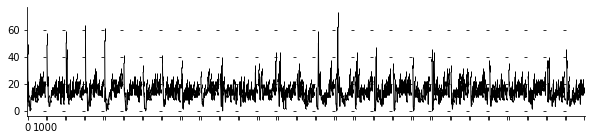

right-bottom, BLN positive:  16


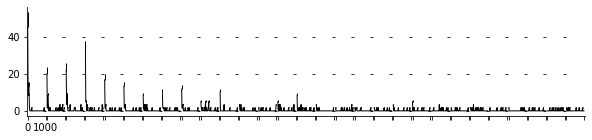

right-bottom, BLN positive:  17


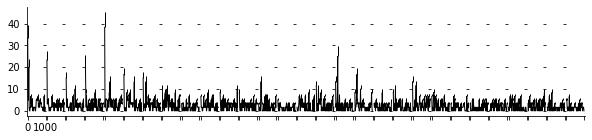

right-bottom, BLN positive:  24


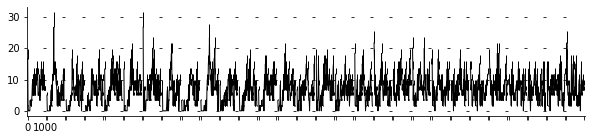

right-bottom, BLN positive:  27


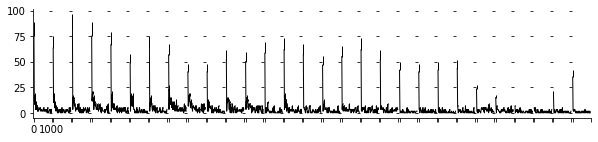

right-bottom, BLN positive:  29


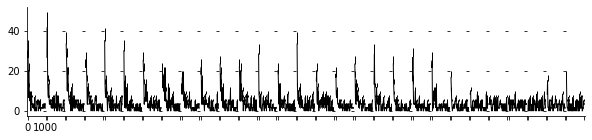

right-bottom, BLN positive:  36


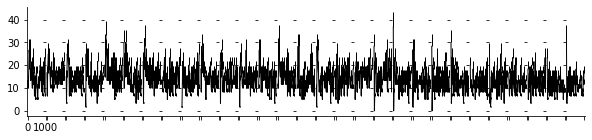

right-bottom, BLN positive:  44


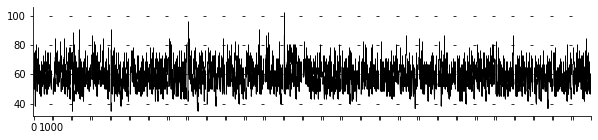

right-bottom, BLN positive:  47


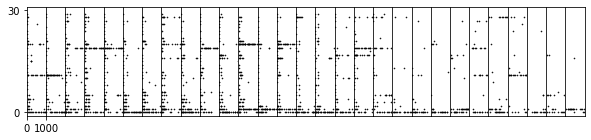

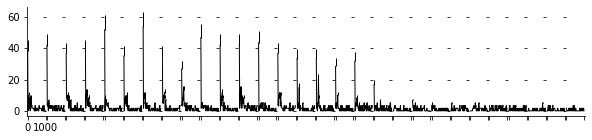

right-bottom, BLN positive:  48


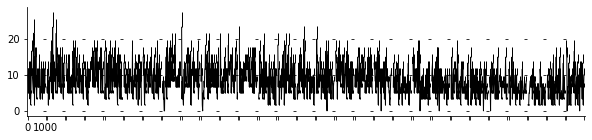

right-bottom, BLN positive:  57


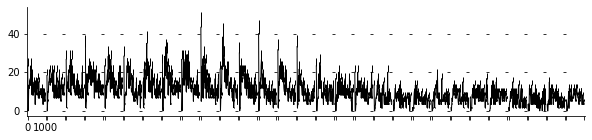

right-bottom, BLN positive:  60


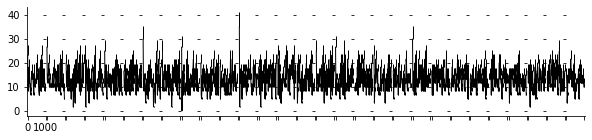

right-bottom, BLN positive:  62


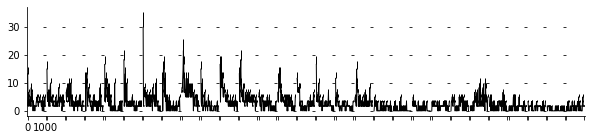

right-bottom, BLN positive:  63


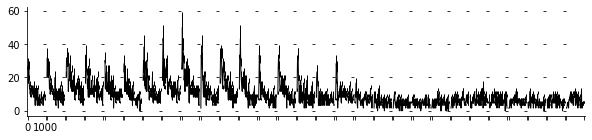

right-bottom, BLN positive:  75


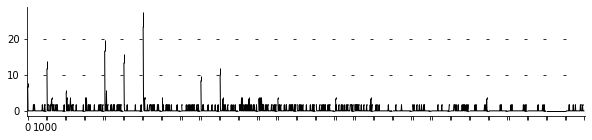

right-bottom, BLN positive:  79


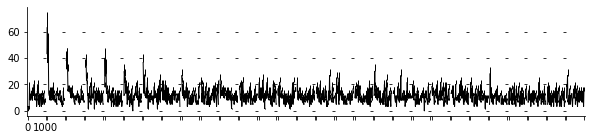

right-bottom, BLN positive:  87


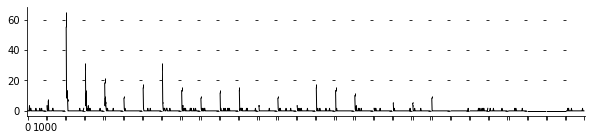

right-bottom, BLN positive:  96


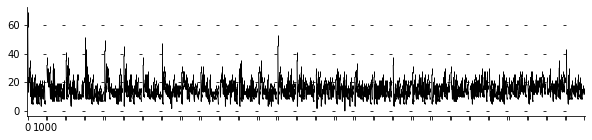

right-bottom, BLN positive:  98


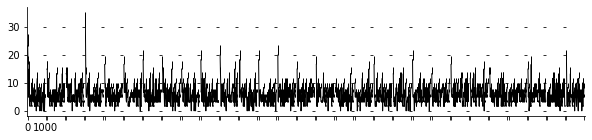

right-bottom, BLN positive:  102


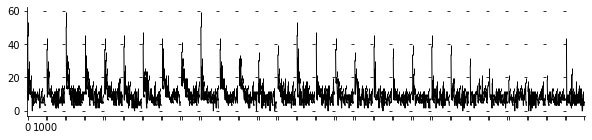

right-bottom, BLN positive:  105


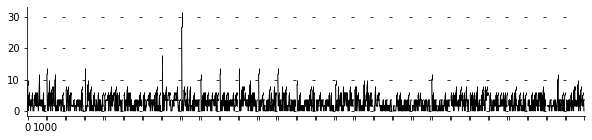

right-bottom, BLN positive:  107


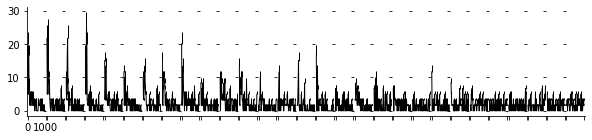

In [11]:
for sim in PURneuron1:
    print('right-top, BLN positive: ', sim)
    if sim in [11, 47]:
        PatternRaster(pat52[:,:,:,sim], savepath = savedir + '/PUR_examples_raster_pre-mus_{0}.png'.format(sim))
    nmean = np.mean(data_mat52[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat52[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,29, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat52.shape[-1])
    for i in range(29):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)
    if sim in [11, 47]:
        plt.savefig(savedir + '/PUR_examples_pre-mus_{0}.png'.format(sim), dpi=300)
    plt.show()
    

for sim in PURneuron3:
    print('right-bottom, BLN positive: ', sim)
    if sim in [11, 47]:
        PatternRaster(pat102[:,:,:,sim], savepath = savedir + '/PUR_examples_raster_post-mus_{0}.png'.format(sim))
    nmean = np.mean(data_mat102[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat102[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,29, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat10.shape[-1])
    for i in range(29):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0) 
    if sim in [11, 47]:
        plt.savefig(savedir + '/PUR_examples_post-mus_{0}.png'.format(sim), dpi=300)
    plt.show()
    

left-top, BLN positive:  4


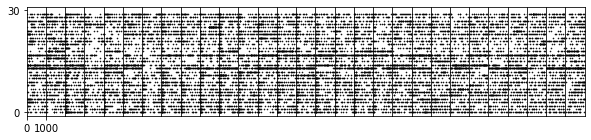

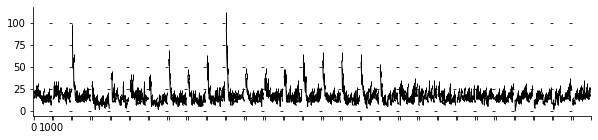

left-top, BLN positive:  7


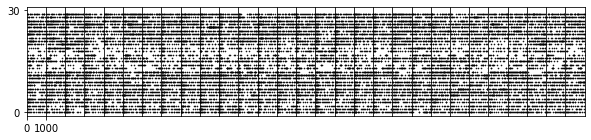

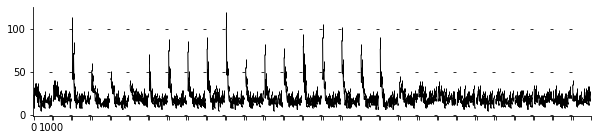

left-top, BLN positive:  9


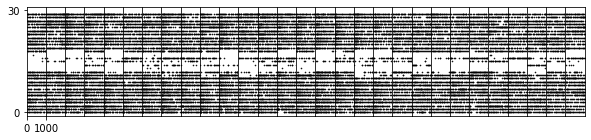

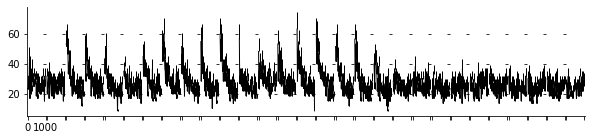

left-top, BLN positive:  23


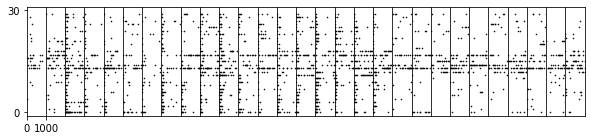

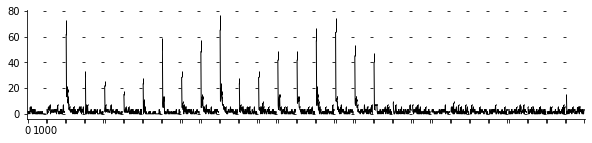

left-top, BLN positive:  27


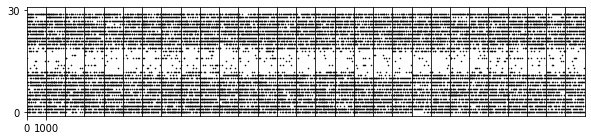

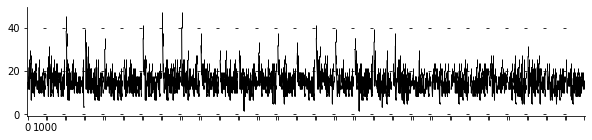

left-top, BLN positive:  73


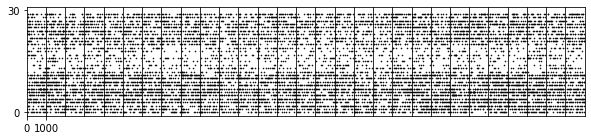

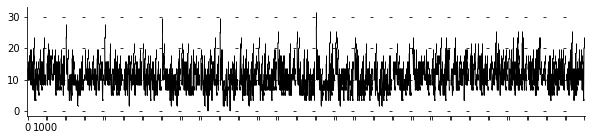

left-top, BLN positive:  86


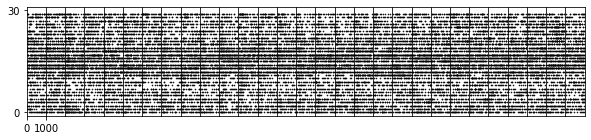

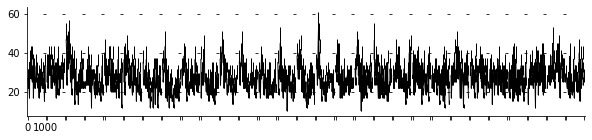

left-top, BLN positive:  101


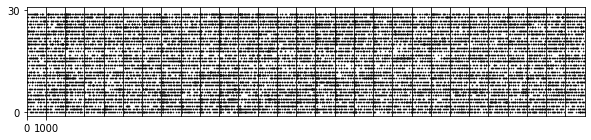

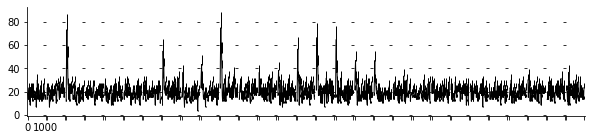

left-top, BLN positive:  108


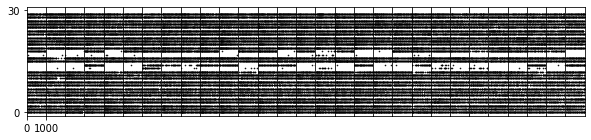

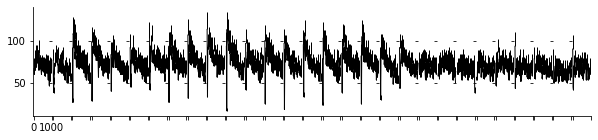

left-top, BLN positive:  145


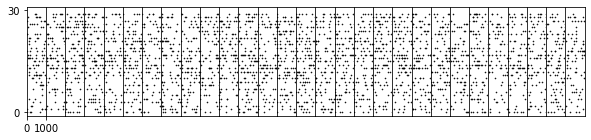

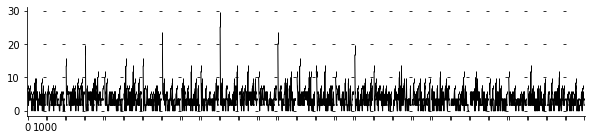

left-top, BLN positive:  157


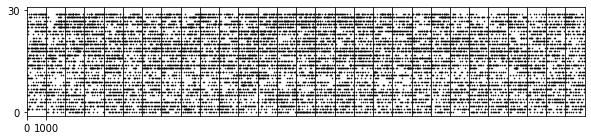

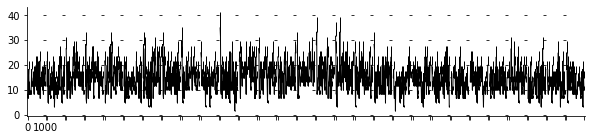

left-top, BLN positive:  165


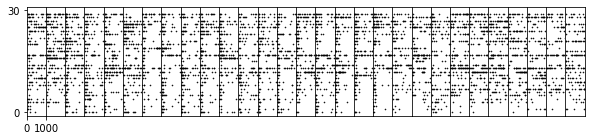

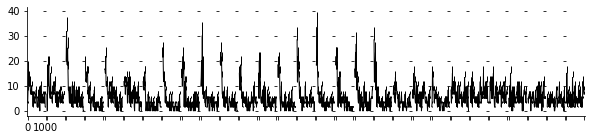

left-top, BLN positive:  167


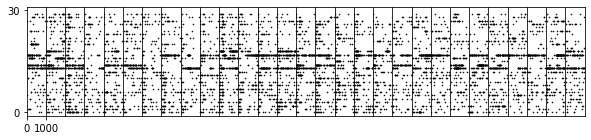

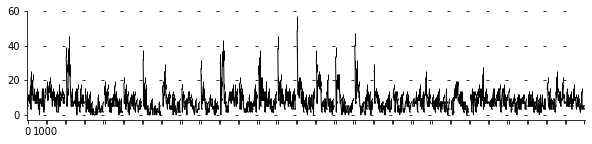

left-top, BLN positive:  194


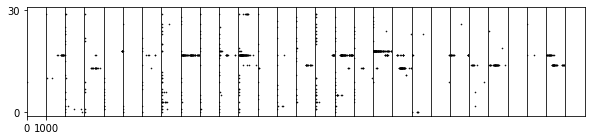

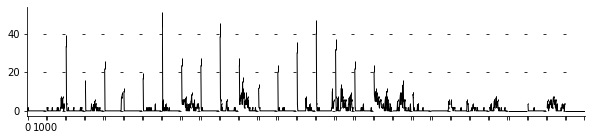

left-bottom, BLN positive:  3


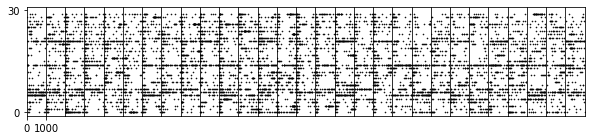

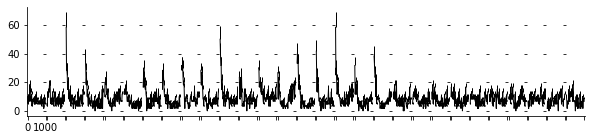

left-bottom, BLN positive:  21


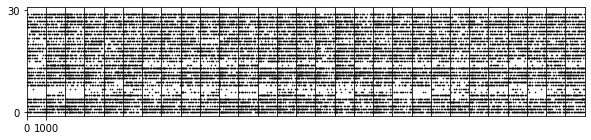

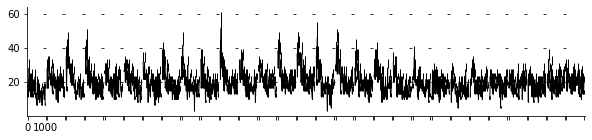

left-bottom, BLN positive:  43


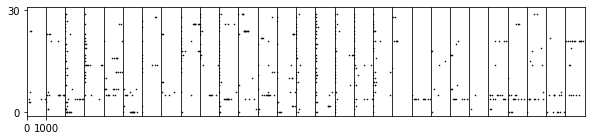

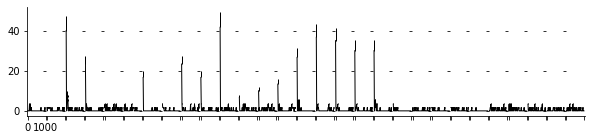

left-bottom, BLN positive:  44


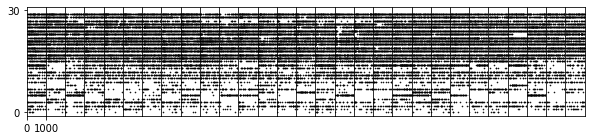

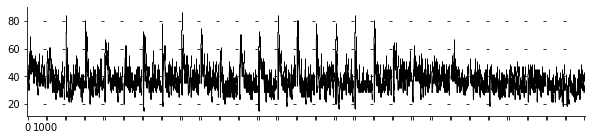

left-bottom, BLN positive:  97


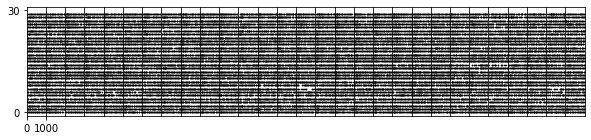

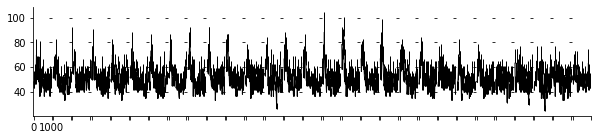

left-bottom, BLN positive:  100


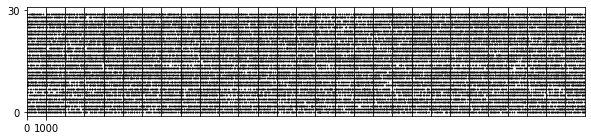

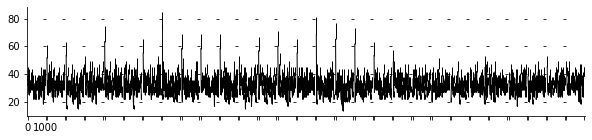

left-bottom, BLN positive:  102


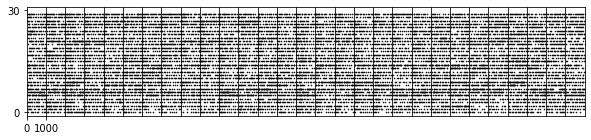

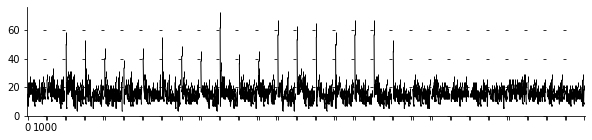

left-bottom, BLN positive:  118


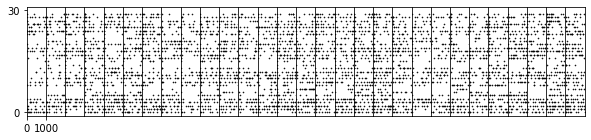

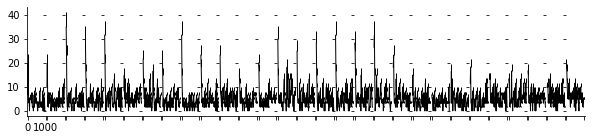

left-bottom, BLN positive:  140


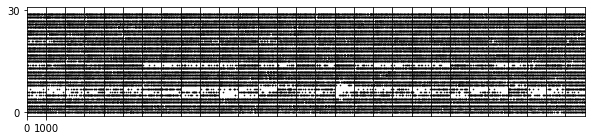

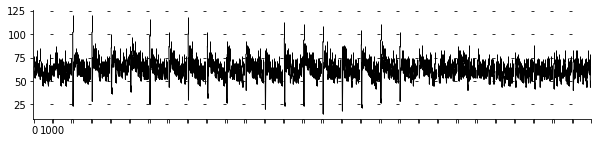

left-bottom, BLN positive:  164


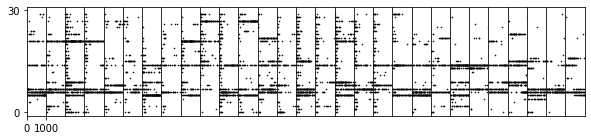

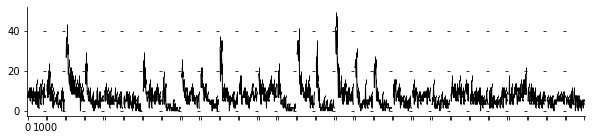

left-bottom, BLN positive:  166


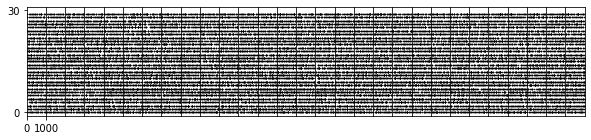

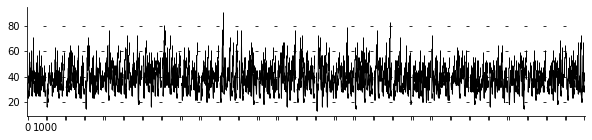

In [28]:
for sim in PURneuron2:
    print('left-top, BLN positive: ', sim)
    PatternRaster(pat5[:,:,:,sim])
    nmean = np.mean(data_mat5[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat5[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,29, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat5.shape[-1])
    for i in range(29):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()
    
for sim in PURneuron4:
    print('left-bottom, BLN positive: ', sim)
    PatternRaster(pat10[:,:,:,sim])
    nmean = np.mean(data_mat10[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat10[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,29, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat10.shape[-1])
    for i in range(29):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()